## Εξαμηνιαία Εργασία Μαθήματος: Νευροασαφής Έλεγχος
Ναταλία-Μαρία Γρηγοριάδου
03118940

## Εισαγωγή
Σκοπός αυτής της εργασίας είναι η δημιουργία Νευρωνικού Δικτύου για την ανίχνευση καρκίνου του παγκρέατος. Ο καρκίνος του παγκρέατος αποτελεί την τέταρτη αιτία θανάτου από όλα τα κακοήθη νεοπλάσματα στο πληθυσμό του δυτικού κόσμου και της Αμερικής, κυρίως στο ανδρικό πληθυσμό. Μόλις το 9% επιβιώνει για περισσότερο από 5 χρόνια μετά την διάγνωση. Αυτό οφείλεται κυρίως στην καθυστερημένη διάγνωση, λόγω απουσίας συμπτωμάτων στα πρώτα στάδια αλλά και της εξειδικευμένης εξέτασης που απαιτείται για την ανίχνευση. Αν ο παγκρεατικός καρκίνος ανιχνευθεί σε πρώιμο στάδιο το ποσοστό επιβίωσης μπορεί να ανέβει στο 70%. 
Το σύνολο δεδομένων για την εκπαίδευση του νευρωνικού πάρθηκε από μια δημοσιευμένη έρευνα για την ανίχνευση του παγκρεατικού καρκίνου μέσα από εξετάσεις ούρων. Συγκεκριμένα μελετάει την επίδραση των παρακάτω πρωτεϊνικών βιοδεικτών:
*	Creatine
*	YVLE1
*	TFF1
*	REG1B



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set()
from sklearn.feature_selection import VarianceThreshold
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
import time
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


## Σύνολο δεδομένων
Το σύνολο δεδομένων που πάρθηκε από το Kaggle περιλαμβάνει τιμές για 590 δείγματα, από διαφορετικές χώρες,για τους πρωτεινικούς βιοδείκτες που αναφέρθηκαν παραπάνω και κάποια επιπλέον χαρακτηριστικά που επειδή δεν χρησιμοποιήθηκαν στην έρευνα σε πολλά δείγματα δεν μετρήθηκαν, και για αυτό δεν χρησιμοποιήθηκαν για την εκπαίδευση του νευρωνικού. Στο σύνολο δεδομένων μεταξύ αυτών των χαρακτηριστηκών υπάρχουν η ηλικία και το φύλο, για στατιστικούς λόγους, και μελετούνται πιο μετά ξεχωριστά.

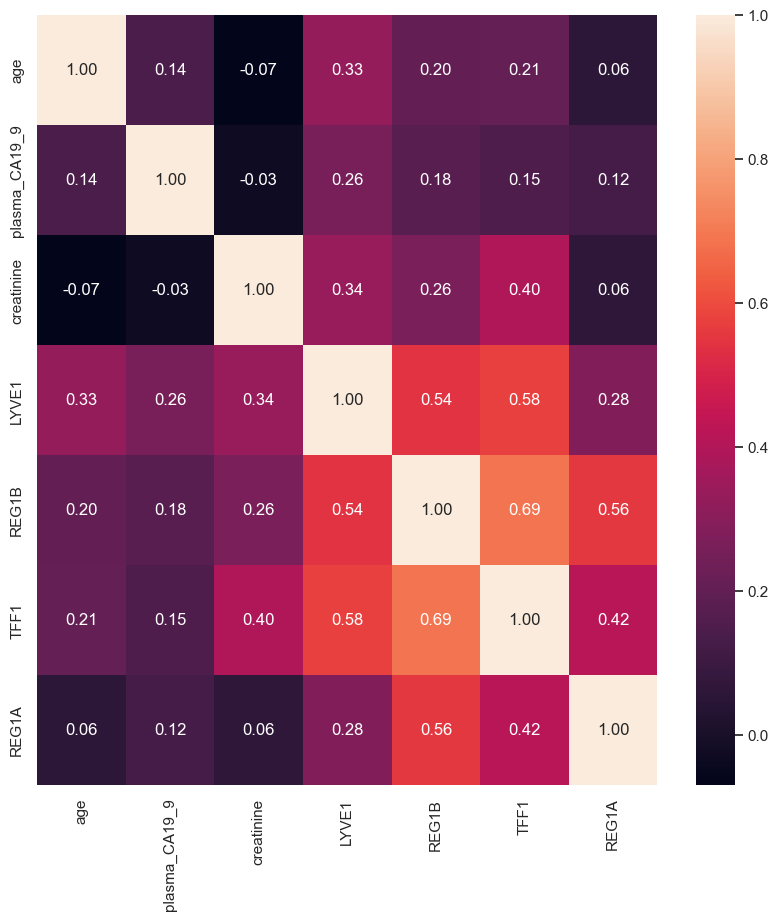

In [2]:
data = pd.read_csv("./Debernardi et al 2020 data.csv")
y = data[["diagnosis"]]
data.drop("diagnosis",axis=1,inplace=True)
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Για την διάγνωση διακρίνουμε τρεις κατηγορίες (κλάσεις):
1. Το πάγκρεας δεν εμφανίζει κάποια ασθένεια
2. Ο ασθενής έχει κάποια άλλη ασθένεια στο παγκρεας
3. Ο ασθενής έχει καρκίνο στο πάγκρεας

In [3]:
data.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [4]:
np.unique(y,return_counts=True)


(array([1, 2, 3], dtype=int64), array([183, 208, 199], dtype=int64))

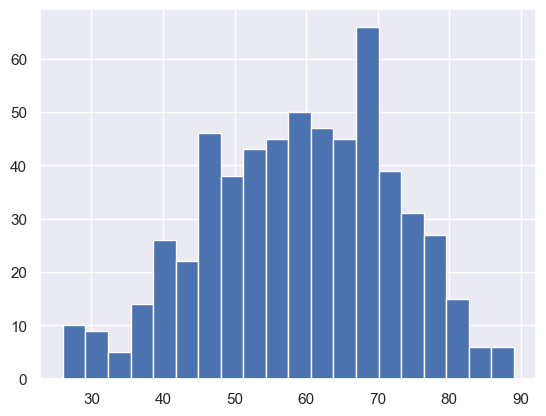

In [5]:
plt.hist(data["age"],bins=20)
plt.show()


Με βάση το paper της έρευνας από τα δεδομένα που μας δίνονται για την ανίχνευση του καρκίνου στο πάγκρεας, χρειαζόμαστε τα εξής χαρακτηριστικά:
* Creatine
* YVLE1
* REG1B
* TFF1
Η ηλικία και το φύλο ίσως να παίζουν κάποιο ρόλο στην ανίχνευση του καρκίνου, οπότε θα μελετηθούν πιο κάτω. Τα υπόλοιπα χαρακτηρίστικα που περιλαμβάνονται στο αρχείο δεν θα χρησιμοποιηθούν, αφού δεν έχουν μετρηθεί για όλους τους ασθενείς και δεν χρησιμοποιήθηκαν στην έρευνα.

In [6]:
drop_columns = ["plasma_CA19_9","REG1A","sample_id","stage","patient_cohort","sample_origin","age","sex","benign_sample_diagnosis"]
for col in drop_columns:
    data.drop(col,axis=1,inplace=True)
X = data

In [7]:
X.head(10)

,creatinine,LYVE1,REG1B,TFF1
0,1.83222,0.893219,52.94884,654.282174
1,0.97266,2.037585,94.46703,209.488250
2,0.78039,0.145589,102.36600,461.141000
3,0.70122,0.002805,60.57900,142.950000
4,0.21489,0.000860,65.54000,41.088000
5,0.84825,0.003393,62.12600,59.793000
6,0.62205,0.174381,152.27700,117.516000
7,0.89349,0.003574,3.73000,40.294000
8,0.48633,0.001945,7.02100,26.782000
9,0.61074,0.278778,83.92800,19.185000


In [8]:
#check for missing values
X.isnull().sum()


creatinine    0
LYVE1         0
REG1B         0
TFF1          0
dtype: int64

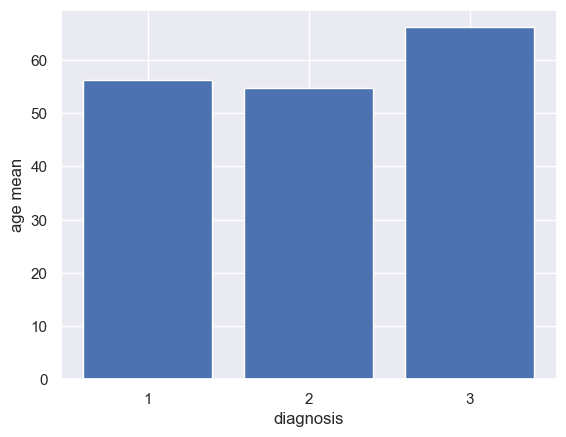

In [29]:
# for each y count the mean of age
age_mean = {'1':0,'2':0,'3':0}
counter = {'1':0,'2':0,'3':0}
for i in range(0, len(X)):
    if y["diagnosis"][i]==1:
        counter['1']+=1
        age_mean['1']+=X["age"][i]            
    elif y["diagnosis"][i]==2:
        age_mean['2']+=X["age"][i]
        counter['2']+=1
    elif y["diagnosis"][i]==3:
        counter['3']+=1
        age_mean['3']+=X["age"][i]
age_mean['1']=age_mean['1']/counter['1']
age_mean['2']=age_mean['2']/counter['2']
age_mean['3']=age_mean['3']/counter['3']
# plot it
plt.bar(age_mean.keys(),age_mean.values())
plt.xlabel("diagnosis")
plt.ylabel("age mean")
plt.show()  



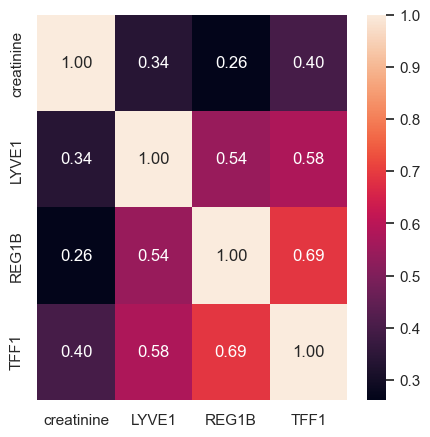

In [9]:
corr = data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


Προκειμένου να ξεκινήσουμε την εκπαίδευση του νευρωνικού, χωρίζουμε το dataset σε training και testing set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (472, 4)
X_test shape:  (118, 4)


### Εκπαίδευση Νευρωνικού
Για την εκπαίδευση του νευρωνικού χρησιμοποιήθηκαν οι εξής ταξινομητές:
*	MLP
*   KNN
*   Logistic Regression
*   SVM
*   Naive Bayes
*	Decision Tree
*	Random Forest

Ως μετρική, για να εκτιμήσουμε τα αποτελέσματα, χρησιμοποιήθηκε το accuracy score και το f1 score.

Δοκιμάζουμε τους αλγόριθμους εκπαίδευσης με τις default τιμές των παραμέτρων (out of the box classifiers).


In [11]:
gnb=GaussianNB()
knn=KNeighborsClassifier()
lr=LogisticRegression()
mlp=MLPClassifier()
svc=SVC()
decision_tree=DecisionTreeClassifier()
random_forest=RandomForestClassifier()

In [12]:
models = [gnb,knn,lr,mlp,svc,decision_tree,random_forest]

Χρησιμοποιούμε για μετρικές το accuracy και το f1-score

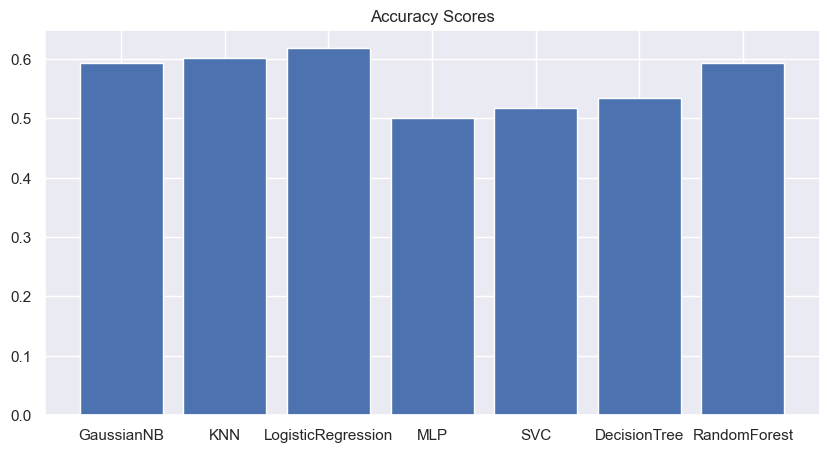

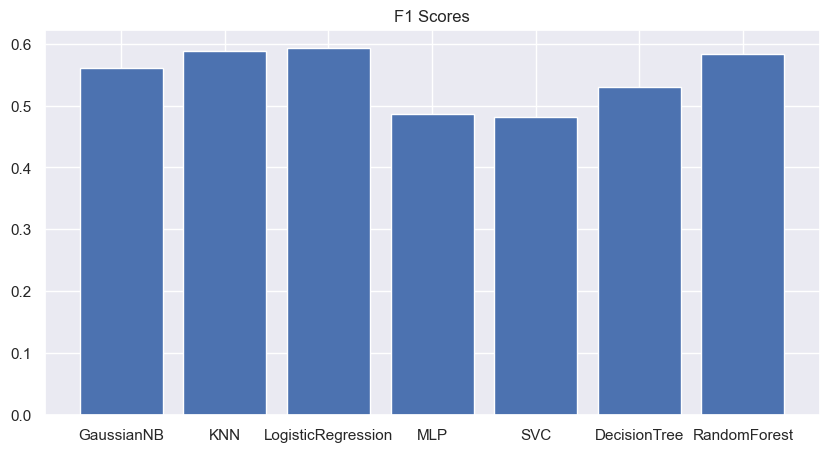

In [13]:
accuracy_scores = []
f1_scores = []

for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    f1_scores.append(f1_score(y_test,y_pred,average="weighted"))

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],accuracy_scores)
plt.title("Accuracy Scores")
plt.show()

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],f1_scores)
plt.title("F1 Scores")
plt.show()


Τα μοντέλα που δοκιμάσαμε φέρνουν πολύ κοντινά αποτελέσματα με τον MLP Classifier να έχει ελαφρώς καλύτερο αποτέλεσμα. Παρακάτω εφαρμόζουμε Grid Search για να βρούμε τις βέλτιστες τιμές των παραμέτρων για όλους τους αλγόριθμους. Με την εφαρμογή του Grid Search επιδιώκουμε να βρούμε τις βέλτιστες τιμές των υπερπαραμέτρων του κάθε ταξινομητή.

In [15]:
#gridsearch for lr
search_space =[{ 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10),
                 'classifier__solver': ['liblinear']
                  }]
pipe = Pipeline(steps=[('classifier', LogisticRegression())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
import warnings
warnings.filterwarnings("ignore")
lr_improved= clf.fit(X_train, y_train)
print('best score for lr:',lr_improved.best_params_)
#gridsearch for mlp
search_space = [{
                'classifier__hidden_layer_sizes': [(),(10),(20),(100)],
                'classifier__solver': ['sgd', 'adam'],
                'classifier__alpha': [0.0001, 0.05, 0.005, 0.01],
                'classifier__learning_rate': ['constant','adaptive'],
                'classifier__max_iter': [100, 1000, 10000],
                'classifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
                'classifier__early_stopping': [True, False]
                }]

pipe = Pipeline(steps=[('classifier', MLPClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
mlp_improved= clf.fit(X_train, y_train)
print('best score for mlp:',mlp_improved.best_params_)
#gridsearch for svc
search_space =[
                {'classifier__kernel': ['rbf'], 
                 'classifier__gamma': [1e-3, 1e-4], 
                 'classifier__C': [1, 10, 100, 1000],
                'classifier__class_weight': ['balanced', None]
                    
                }]
pipe = Pipeline(steps=[('classifier', SVC())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
svc_imp=clf.fit(X_train, y_train)
print('best score for svc:',svc_imp.best_params_)
#gridsearch for decision tree
search_space =[{  'classifier__criterion': ['gini', 'entropy'],
                  'classifier__splitter': ['best', 'random'],
                  'classifier__max_depth': [1,5,10],
                  'classifier__min_samples_split': [2,5,10],
                  'classifier__min_samples_leaf': [1,510],
                } ]
pipe = Pipeline(steps=[('classifier', DecisionTreeClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
decision_tree_improved= clf.fit(X_train, y_train)
print('best score for decision tree:',decision_tree_improved.best_params_)
#gridsearch for random forest
search_space =[
                {'classifier__n_estimators': [10,100,200,500,1000],
                 'classifier__max_depth': [1,5,10],
                }]
pipe = Pipeline(steps=[('classifier', RandomForestClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
random_forest_improved= clf.fit(X_train, y_train)
print('best score for random forest:',random_forest_improved.best_params_)
#gridsearch for knn
search_space =[
                
                {'classifier__n_neighbors': [1, 3, 5, 7],
                 'classifier__metric':['euclidean','manhattan'],
                    
                }]
pipe = Pipeline(steps=[('classifier', KNeighborsClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
knn_imp=clf.fit(X_train, y_train)
print('best score for knn:',knn_imp.best_params_)
#gridsearch for gnb
search_space =[
    {'classifier__var_smoothing': [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]

                }]
pipe = Pipeline(steps=[('classifier', GaussianNB())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
import warnings
warnings.filterwarnings("ignore")
gnb_improved= clf.fit(X_train, y_train)
print('best score for gnb:',gnb_improved.best_params_)



best score for lr: {'classifier__C': 1.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
best score for mlp: {'classifier__activation': 'identity', 'classifier__alpha': 0.0001, 'classifier__early_stopping': True, 'classifier__hidden_layer_sizes': (), 'classifier__learning_rate': 'constant', 'classifier__max_iter': 100, 'classifier__solver': 'sgd'}
best score for svc: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
best score for decision tree: {'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
best score for random forest: {'classifier__max_depth': 1, 'classifier__n_estimators': 10}
best score for knn: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1}
best score for gnb: {'classifier__var_smoothing': 1e-09}


In [16]:
models_improved = [gnb_improved,knn_imp,lr_improved,mlp_improved,svc_imp,decision_tree_improved,random_forest_improved]

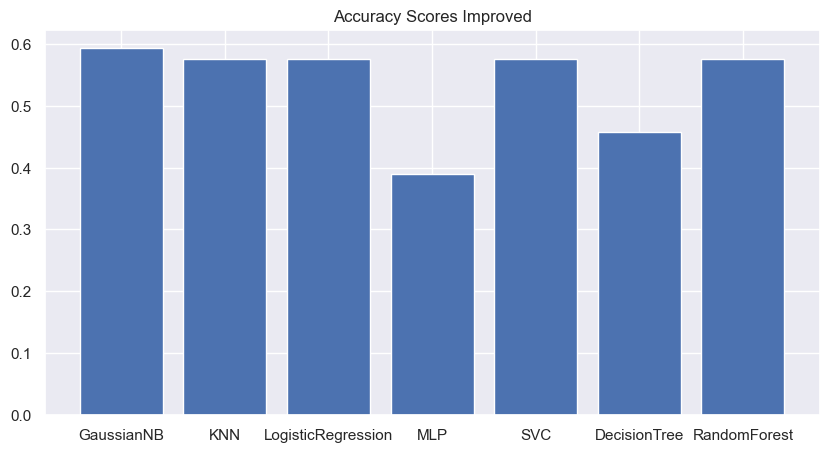

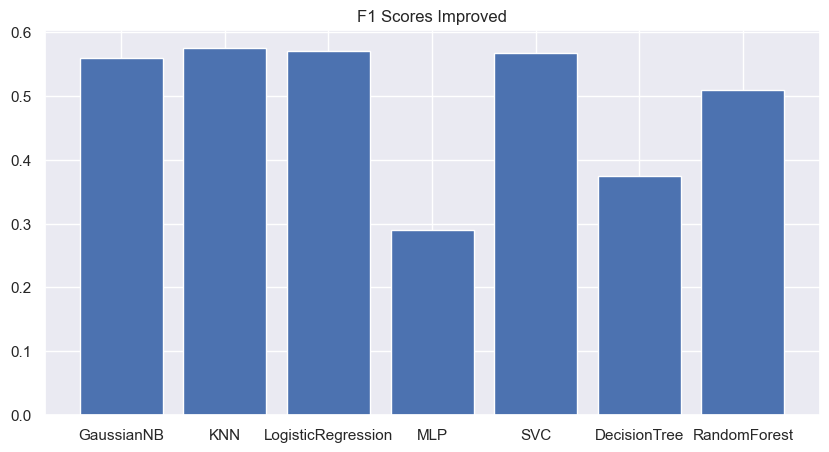

In [17]:
#predicting with the improved models
accuracy_scores_improved = []
f1_scores_improved = []
models_improved = [gnb_improved,knn_imp,lr_improved,mlp_improved,svc_imp,decision_tree_improved,random_forest_improved]
for model in models_improved:
    y_pred = model.predict(X_test)
    accuracy_scores_improved.append(accuracy_score(y_test,y_pred))
    f1_scores_improved.append(f1_score(y_test,y_pred,average="weighted"))

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],accuracy_scores_improved)
plt.title("Accuracy Scores Improved")
plt.show()
#plot f1 scores
plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],f1_scores_improved)
plt.title("F1 Scores Improved")
plt.show()




Παρατηρούμε ότι δεν επιτυγχανουμε μεγάλη αύξηση στις μετρικές των ταξινομητών, ίσα ίσα σε κάποιους ταξινομητές μειώνονται σημαντικά. Αυτό μπορεί να οφείλεται στο μικρό μέγεθος του dataset και στην απλότητα του προβλήματος. Θα επιχειρήσουμε να χρησιμοποιήσουμε την μέθοδο του pipeling για να βελτιώσουμε τα αποτελέσματα.

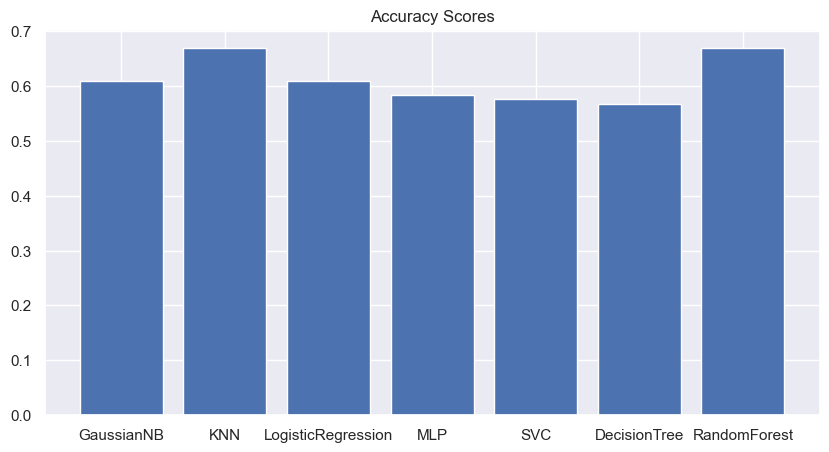

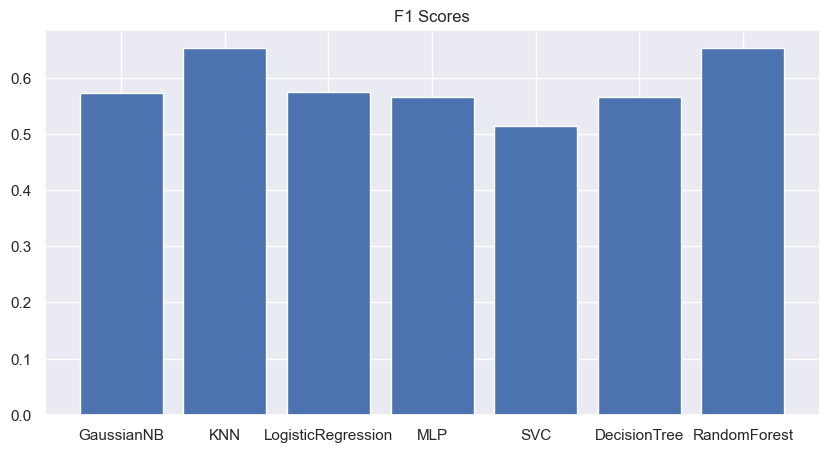

In [14]:
from imblearn.over_sampling import RandomOverSampler
selector = VarianceThreshold(0.00001)
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
accuracy=[]
f1=[]
for clf in models:
    pipe = Pipeline(steps = [('selector',selector),('scaler', scaler),('sampler',ros),('pca',pca),('clf',clf)], memory = 'tmp')
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred,average="weighted"))

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],accuracy)
plt.title("Accuracy Scores")
plt.show()

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],f1)
plt.title("F1 Scores")
plt.show()
    

Παρατηρούμε μια αύξηση σε κάποιους ταξινομητές. Στην συνέχεια, με στόχο και πάλι την βελτιστοποίηση των υπερπαραμέτρων των ταξινομητών, χρησιμοποιούμε την βιβλιοθήκη optuna, η οποία για τον κάθε ταξινομητή κάνει δοκιμές με διαφορετικές τιμές των υπερπαραμέτρων και επιλέγει τις βέλτιστες. 

In [18]:
import optuna
import sklearn.datasets

import sklearn.neural_network

def objective(trial):
    vr = VarianceThreshold(0.0001)
    sc = StandardScaler()
    

    score = 0
  
    x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)
    y_train =  np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    x_train = vr.fit_transform(x_train)
    mask = vr.get_support()
    x_test = np.array(x_test)[:,mask]

    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
    
        # Sample hyper parameters
    activation = trial.suggest_categorical('activation', ["identity", "logistic", "tanh", "relu"])
    solver = trial.suggest_categorical("solver", 
                                              ["sgd", "adam"])
    tol = trial.suggest_float('tol', 1e-8,1e-1, step= 1e-7)
    learning_rate = trial.suggest_categorical('learning_rate', 
                                           ["constant","invscaling"])
    layers = trial.suggest_int('layers',100,1000,100)
        # Construct the model
    clf = MLPClassifier(activation=activation,
                               solver=solver,
                              tol=tol,
                               learning_rate=learning_rate,
                               hidden_layer_sizes=layers, random_state=0, max_iter=3000
                               )

    score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
    
        

    return score


    

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
#print the best parameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)



[I 2023-03-14 14:50:20,192] A new study created in memory with name: no-name-11d285d6-7d8a-485b-8374-43941e0f9ba0
[I 2023-03-14 14:50:21,232] Trial 0 finished with value: 0.4678326330532213 and parameters: {'activation': 'relu', 'solver': 'sgd', 'tol': 0.01514581, 'learning_rate': 'constant', 'layers': 500}. Best is trial 0 with value: 0.4678326330532213.
[I 2023-03-14 14:50:21,728] Trial 1 finished with value: 0.5216900093370682 and parameters: {'activation': 'relu', 'solver': 'adam', 'tol': 0.06927710999999999, 'learning_rate': 'invscaling', 'layers': 300}. Best is trial 1 with value: 0.5216900093370682.
[I 2023-03-14 14:50:23,838] Trial 2 finished with value: 0.531014239028945 and parameters: {'activation': 'tanh', 'solver': 'adam', 'tol': 0.03347561, 'learning_rate': 'constant', 'layers': 700}. Best is trial 2 with value: 0.531014239028945.
[I 2023-03-14 14:50:25,051] Trial 3 finished with value: 0.5332633053221288 and parameters: {'activation': 'identity', 'solver': 'adam', 'tol':

Number of finished trials: 50
Best trial: {'activation': 'identity', 'solver': 'adam', 'tol': 0.04013071, 'learning_rate': 'invscaling', 'layers': 800}
Best value: 0.5818464052287581


In [19]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)


Number of finished trials: 50
Best trial: {'activation': 'identity', 'solver': 'adam', 'tol': 0.04013071, 'learning_rate': 'invscaling', 'layers': 800}
Best value: 0.5818464052287581


In [20]:
#optuna for knn
def objective(trial):
    vr = VarianceThreshold(0.0001)
    sc = StandardScaler()
    

    score = 0
  
    x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)
    y_train =  np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    x_train = vr.fit_transform(x_train)
    mask = vr.get_support()
    x_test = np.array(x_test)[:,mask]

    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
    
        # Sample hyper parameters
    n_neighbors = trial.suggest_int('n_neighbors', 1, 10)
    metric = trial.suggest_categorical("metric", 
                                              ["euclidean", "manhattan"])
    weights = trial.suggest_categorical('weights', 
                                           ["uniform","distance"])
    p = trial.suggest_int('p',1,10)
        # Construct the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,
                               metric=metric,
                              weights=weights,
                               p=p
                               )

    score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
    
        

    return score



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
#print the best parameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)


[I 2023-03-14 14:51:31,765] A new study created in memory with name: no-name-50676115-e481-4bf8-8a74-4bf96335148a
[I 2023-03-14 14:51:31,821] Trial 0 finished with value: 0.5735609243697479 and parameters: {'n_neighbors': 4, 'metric': 'euclidean', 'weights': 'uniform', 'p': 5}. Best is trial 0 with value: 0.5735609243697479.
[I 2023-03-14 14:51:31,853] Trial 1 finished with value: 0.5704470121381886 and parameters: {'n_neighbors': 6, 'metric': 'euclidean', 'weights': 'distance', 'p': 9}. Best is trial 0 with value: 0.5735609243697479.
[I 2023-03-14 14:51:31,893] Trial 2 finished with value: 0.5735609243697479 and parameters: {'n_neighbors': 4, 'metric': 'euclidean', 'weights': 'uniform', 'p': 6}. Best is trial 0 with value: 0.5735609243697479.
[I 2023-03-14 14:51:31,942] Trial 3 finished with value: 0.5735609243697479 and parameters: {'n_neighbors': 4, 'metric': 'euclidean', 'weights': 'uniform', 'p': 6}. Best is trial 0 with value: 0.5735609243697479.
[I 2023-03-14 14:51:31,976] Trial

Number of finished trials: 50
Best trial: {'n_neighbors': 10, 'metric': 'manhattan', 'weights': 'uniform', 'p': 6}
Best value: 0.5989612511671334


In [21]:
def objective_svm(trial):
    vr = VarianceThreshold(0.0001)
    sc = StandardScaler()

    score = 0
  
    x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=0)
    y_train =  np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    x_train = vr.fit_transform(x_train)
    mask = vr.get_support()
    x_test = np.array(x_test)[:,mask]

    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
 
    # Sample hyper parameters
    C = trial.suggest_float('C', 1e-10, 1)
    kernel = trial.suggest_categorical('kernel',['poly','rbf','sigmoid'])
    degree = trial.suggest_int('degree',1, 50)
    
    clf = SVC(C=C,kernel=kernel,degree=degree, random_state=0, max_iter=3000)
    score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
    return score


    

study = optuna.create_study(direction='maximize')
study.optimize(objective_svm, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)



[I 2023-03-14 14:51:34,260] A new study created in memory with name: no-name-eaf0316d-3349-43c6-952f-f38ac9d09201
[I 2023-03-14 14:51:34,415] Trial 0 finished with value: 0.5646977124183007 and parameters: {'C': 0.526290379598755, 'kernel': 'rbf', 'degree': 48}. Best is trial 0 with value: 0.5646977124183007.
[I 2023-03-14 14:51:34,561] Trial 1 finished with value: 0.39448529411764705 and parameters: {'C': 0.8168573547656324, 'kernel': 'poly', 'degree': 16}. Best is trial 0 with value: 0.5646977124183007.
[I 2023-03-14 14:51:34,729] Trial 2 finished with value: 0.39607843137254906 and parameters: {'C': 0.017816976487161833, 'kernel': 'rbf', 'degree': 41}. Best is trial 0 with value: 0.5646977124183007.
[I 2023-03-14 14:51:34,884] Trial 3 finished with value: 0.570702614379085 and parameters: {'C': 0.8171441180857418, 'kernel': 'rbf', 'degree': 19}. Best is trial 3 with value: 0.570702614379085.
[I 2023-03-14 14:51:35,012] Trial 4 finished with value: 0.5666584967320262 and parameters: 

Number of finished trials: 50
Best trial: {'C': 0.8008355941948462, 'kernel': 'rbf', 'degree': 17}
Best value: 0.5729248366013071


In [22]:
#optuna for decision tree
def objective(trial):

    vr = VarianceThreshold(0.0001)
    sc = StandardScaler()
    

    score = 0
  
    x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)
    y_train =  np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    x_train = vr.fit_transform(x_train)
    mask = vr.get_support()
    x_test = np.array(x_test)[:,mask]

    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
    
        # Sample hyper parameters
    criterion = trial.suggest_categorical('criterion', ["gini", "entropy"])
    splitter = trial.suggest_categorical("splitter", 
                                              ["best", "random"])
    max_depth = trial.suggest_int('max_depth',1,10)
    min_samples_split = trial.suggest_int('min_samples_split',2,10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',1,10)
    max_features = trial.suggest_categorical('max_features', 
                                           ["auto","sqrt","log2"])
        # Construct the model
    clf = DecisionTreeClassifier(criterion=criterion,
                               splitter=splitter,
                              max_depth=max_depth,
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf,
                               max_features=max_features
                               )

    score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
    
        

    return score



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
#print the best parameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)


[I 2023-03-14 14:51:41,412] A new study created in memory with name: no-name-81a692ec-84e0-42af-bdd0-130782456099
[I 2023-03-14 14:51:41,445] Trial 0 finished with value: 0.5269736227824463 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.5269736227824463.
[I 2023-03-14 14:51:41,477] Trial 1 finished with value: 0.5263083566760037 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 0 with value: 0.5269736227824463.
[I 2023-03-14 14:51:41,509] Trial 2 finished with value: 0.518796685340803 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.5269736227824463.
[I 2023-03-14 14:51:41,549] Trial 3 finished with value: 0.5416106442

Number of finished trials: 50
Best trial: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'auto'}
Best value: 0.5954435107376284


In [23]:
#optuna for random forest
def objective(trial):
    
        vr = VarianceThreshold(0.0001)
        sc = StandardScaler()
        
    
        score = 0
    
        x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)
        y_train =  np.ravel(y_train)
        y_test = np.ravel(y_test)
        
        x_train = vr.fit_transform(x_train)
        mask = vr.get_support()
        x_test = np.array(x_test)[:,mask]
    
        x_train = sc.fit_transform(x_train)
        x_test = sc.fit_transform(x_test)
        
            # Sample hyper parameters
        criterion = trial.suggest_categorical('criterion', ["gini", "entropy"])
        max_depth = trial.suggest_int('max_depth',1,10)
        min_samples_split = trial.suggest_int('min_samples_split',2,10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf',1,10)
        max_features = trial.suggest_categorical('max_features', 
                                            ["auto","sqrt","log2"])
        n_estimators = trial.suggest_int('n_estimators',10,100)
            # Construct the model
        clf = RandomForestClassifier(criterion=criterion,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                n_estimators=n_estimators
                                )
    
        score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
        
            
    
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
#print the best parameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)


[I 2023-03-14 14:51:43,670] A new study created in memory with name: no-name-1f3e05b2-13a1-4b50-a0e4-f1e033b722db
[I 2023-03-14 14:51:43,962] Trial 0 finished with value: 0.5711823062558355 and parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'auto', 'n_estimators': 13}. Best is trial 0 with value: 0.5711823062558355.
[I 2023-03-14 14:51:44,177] Trial 1 finished with value: 0.5457446311858077 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'n_estimators': 11}. Best is trial 0 with value: 0.5711823062558355.
[I 2023-03-14 14:51:45,374] Trial 2 finished with value: 0.606265172735761 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'n_estimators': 46}. Best is trial 2 with value: 0.606265172735761.
[I 2023-03-14 14:51:46,836] Trial 3 finished with value: 0.613984593837535

Number of finished trials: 50
Best trial: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'n_estimators': 57}
Best value: 0.6179785247432306


In [24]:
#optuna for gnb
def objective(trial):
        
            vr = VarianceThreshold(0.0001)
            sc = StandardScaler()
            
        
            score = 0
        
            x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)
            y_train =  np.ravel(y_train)
            y_test = np.ravel(y_test)
            
            x_train = vr.fit_transform(x_train)
            mask = vr.get_support()
            x_test = np.array(x_test)[:,mask]
        
            x_train = sc.fit_transform(x_train)
            x_test = sc.fit_transform(x_test)
            
                # Sample hyper parameters
            var_smoothing = trial.suggest_float('var_smoothing',1e-10,1e-1, step= 1e-7)
                # Construct the model
            clf = GaussianNB(var_smoothing=var_smoothing)
        
            score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
            
                
        
            return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
#print the best parameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)


[I 2023-03-14 14:52:50,267] A new study created in memory with name: no-name-a3694dc5-091c-45e0-8b6b-5e151e6c6181
[I 2023-03-14 14:52:50,298] Trial 0 finished with value: 0.5033298319327731 and parameters: {'var_smoothing': 0.0263458001}. Best is trial 0 with value: 0.5033298319327731.
[I 2023-03-14 14:52:50,324] Trial 1 finished with value: 0.4994082633053222 and parameters: {'var_smoothing': 0.0540251001}. Best is trial 0 with value: 0.5033298319327731.
[I 2023-03-14 14:52:50,356] Trial 2 finished with value: 0.5033298319327731 and parameters: {'var_smoothing': 0.0249206001}. Best is trial 0 with value: 0.5033298319327731.
[I 2023-03-14 14:52:50,380] Trial 3 finished with value: 0.49970588235294117 and parameters: {'var_smoothing': 0.06688180009999999}. Best is trial 0 with value: 0.5033298319327731.
[I 2023-03-14 14:52:50,412] Trial 4 finished with value: 0.49970588235294117 and parameters: {'var_smoothing': 0.08297470009999999}. Best is trial 0 with value: 0.5033298319327731.
[I 20

Number of finished trials: 50
Best trial: {'var_smoothing': 2.0800099999999998e-05}
Best value: 0.507373949579832


## Σχόλιο
Παρατηρούμε ότι τα αποτελέσματα δεν αυξάνονται σημαντικά. Θα εξετάσουμε τώρα την επίδραση της ηλικίας και του φύλου στην ανίχνευση του καρκίνου.

In [25]:
data = pd.read_csv("./Debernardi et al 2020 data.csv")
y = data[["diagnosis"]]
data.drop("diagnosis",axis=1,inplace=True)
drop_columns = ["plasma_CA19_9","REG1A","sample_id","stage","patient_cohort","sample_origin","benign_sample_diagnosis"]

X = data
for col in drop_columns:
    X.drop(col,axis=1,inplace=True)
X.isnull().sum()

age           0
sex           0
creatinine    0
LYVE1         0
REG1B         0
TFF1          0
dtype: int64

In [26]:
#convert sex feature to numeric
X["sex"] = X["sex"].map({"M":0,"F":1})
X.isnull().sum()



age           0
sex           0
creatinine    0
LYVE1         0
REG1B         0
TFF1          0
dtype: int64

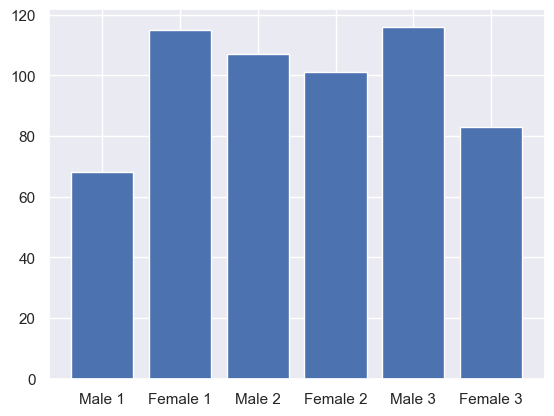

In [28]:
female_count={'1':0,'2':0,'3':0}
male_count={'1':0,'2':0,'3':0}
for i in range(0, len(X)):
    if X["sex"][i]==1:
        if y["diagnosis"][i]==1:
            female_count['1']+=1            
        elif y["diagnosis"][i]==2:
            female_count['2']+=1
        elif y["diagnosis"][i]==3:
            female_count['3']+=1
    else:
        if y['diagnosis'][i]==1:
            male_count['1']+=1            
        elif y["diagnosis"][i]==2:
            male_count['2']+=1
        elif y["diagnosis"][i]==3:
            male_count['3']+=1
 

labels = ['Male 1', 'Female 1','Male 2', 'Female 2','Male 3', 'Female 3',]
values = [male_count['1'], female_count['1'], male_count['2'], female_count['2'],male_count['3'], female_count['3']]
plt.bar(labels, values)
plt.figzise=(10,10)
plt.show()

In [30]:
X.isnull().sum()

age           0
sex           0
creatinine    0
LYVE1         0
REG1B         0
TFF1          0
dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = []

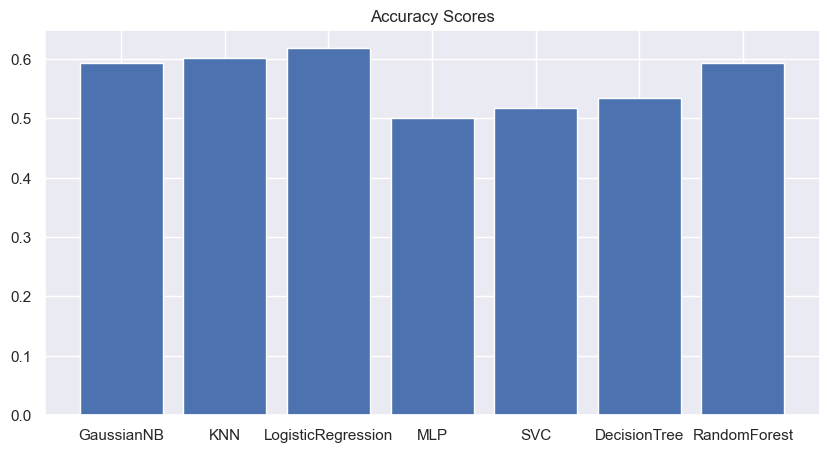

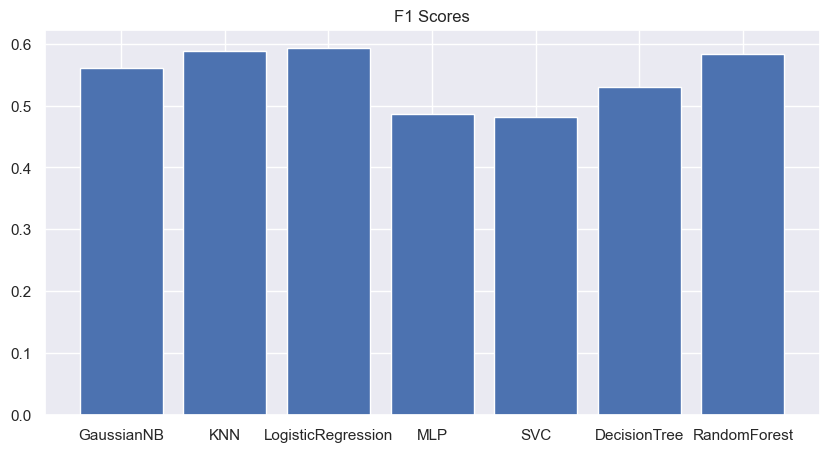

In [32]:
accuracy_scores_increased = []
f1_scores_increased = []
models = [gnb,knn,lr,mlp,svc,decision_tree,random_forest]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_scores_increased.append(accuracy_score(y_test,y_pred))
    f1_scores_increased.append(f1_score(y_test,y_pred,average="weighted"))

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],accuracy_scores)
plt.title("Accuracy Scores")
plt.show()

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],f1_scores)
plt.title("F1 Scores")
plt.show()

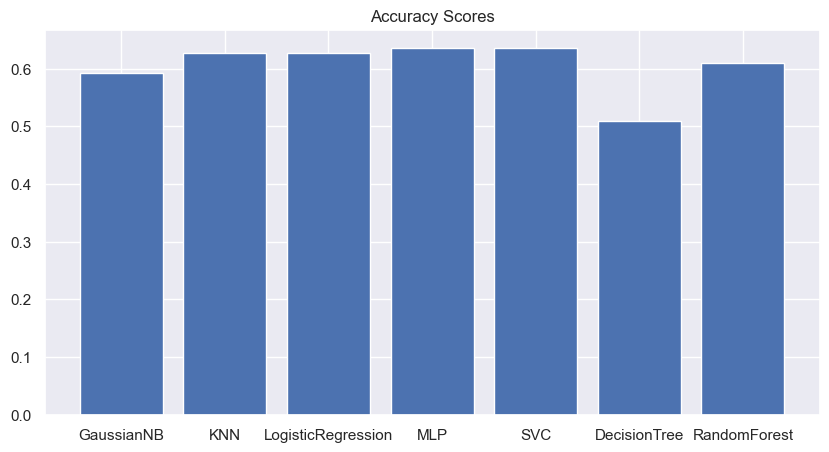

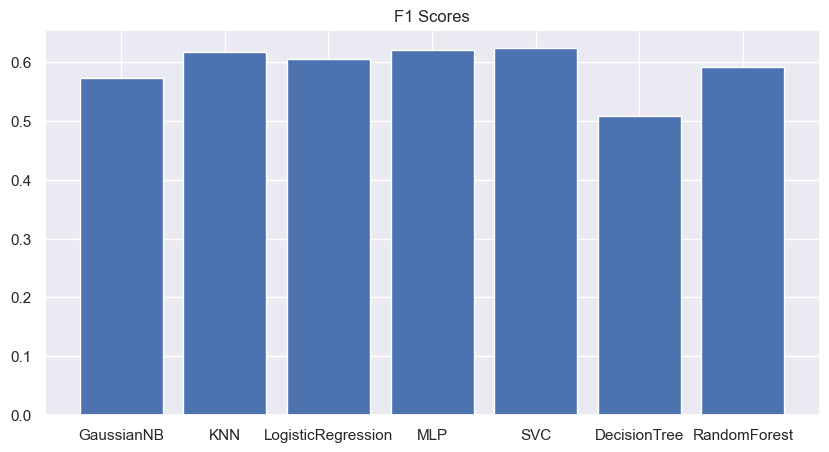

In [33]:
selector = VarianceThreshold(0.00001)
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
accuracy=[]
f1=[]
for clf in models:
    pipe = Pipeline(steps = [('selector',selector),('scaler', scaler),('sampler',ros),('pca',pca),('clf',clf)], memory = 'tmp')
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred,average="weighted"))

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],accuracy)
plt.title("Accuracy Scores")
plt.show()

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],f1)
plt.title("F1 Scores")
plt.show()


In [34]:
#gridsearch for lr
search_space =[{ 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10),
                 'classifier__solver': ['liblinear']
                  }]
pipe = Pipeline(steps=[('classifier', LogisticRegression())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
import warnings
warnings.filterwarnings("ignore")
lr_improved= clf.fit(X_train, y_train)
print('best score for lr:',lr_improved.best_params_)
#gridsearch for mlp
search_space = [{
                'classifier__hidden_layer_sizes': [(),(10),(20),(100)],
                'classifier__solver': ['sgd', 'adam'],
                'classifier__alpha': [0.0001, 0.05, 0.005, 0.01],
                'classifier__learning_rate': ['constant','adaptive'],
                'classifier__max_iter': [100, 1000, 10000],
                'classifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
                'classifier__early_stopping': [True, False]
                }]

pipe = Pipeline(steps=[('classifier', MLPClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
mlp_improved= clf.fit(X_train, y_train)
print('best score for mlp:',mlp_improved.best_params_)
#gridsearch for svc
search_space =[
                {'classifier__kernel': ['rbf'], 
                 'classifier__gamma': [1e-3, 1e-4], 
                 'classifier__C': [1, 10, 100, 1000],
                'classifier__class_weight': ['balanced', None]
                    
                }]
pipe = Pipeline(steps=[('classifier', SVC())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
svc_imp=clf.fit(X_train, y_train)
print('best score for svc:',svc_imp.best_params_)
#gridsearch for decision tree
search_space =[{  'classifier__criterion': ['gini', 'entropy'],
                  'classifier__splitter': ['best', 'random'],
                  'classifier__max_depth': [1,5,10],
                  'classifier__min_samples_split': [2,5,10],
                  'classifier__min_samples_leaf': [1,510],
                } ]
pipe = Pipeline(steps=[('classifier', DecisionTreeClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
decision_tree_improved= clf.fit(X_train, y_train)
print('best score for decision tree:',decision_tree_improved.best_params_)
#gridsearch for random forest
search_space =[
                {'classifier__n_estimators': [10,100,200,500,1000],
                 'classifier__max_depth': [1,5,10],
                }]
pipe = Pipeline(steps=[('classifier', RandomForestClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
random_forest_improved= clf.fit(X_train, y_train)
print('best score for random forest:',random_forest_improved.best_params_)
#gridsearch for knn
search_space =[
                
                {'classifier__n_neighbors': [1, 3, 5, 7],
                 'classifier__metric':['euclidean','manhattan'],
                    
                }]
pipe = Pipeline(steps=[('classifier', KNeighborsClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
knn_imp=clf.fit(X_train, y_train)
print('best score for knn:',knn_imp.best_params_)
#gridsearch for gnb
search_space =[
    {'classifier__var_smoothing': [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]

                }]
pipe = Pipeline(steps=[('classifier', GaussianNB())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
import warnings
warnings.filterwarnings("ignore")
gnb_improved= clf.fit(X_train, y_train)
print('best score for gnb:',gnb_improved.best_params_)



best score for lr: {'classifier__C': 1.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
best score for mlp: {'classifier__activation': 'identity', 'classifier__alpha': 0.0001, 'classifier__early_stopping': True, 'classifier__hidden_layer_sizes': (), 'classifier__learning_rate': 'constant', 'classifier__max_iter': 100, 'classifier__solver': 'sgd'}
best score for svc: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
best score for decision tree: {'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
best score for random forest: {'classifier__max_depth': 1, 'classifier__n_estimators': 10}
best score for knn: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1}
best score for gnb: {'classifier__var_smoothing': 1e-09}


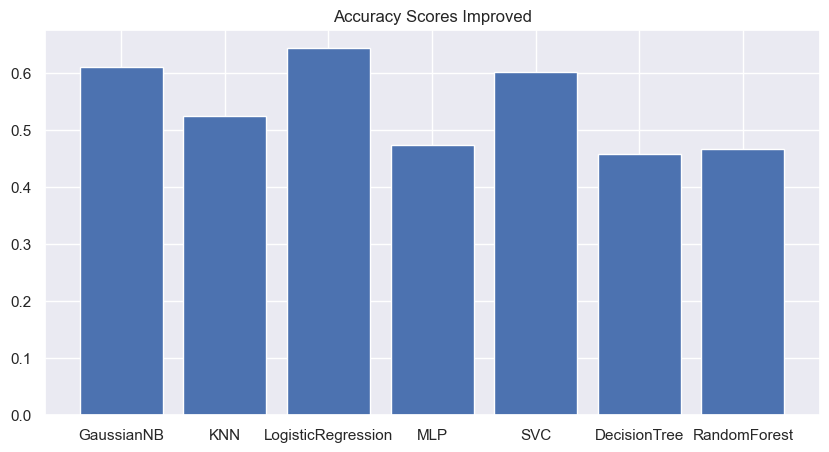

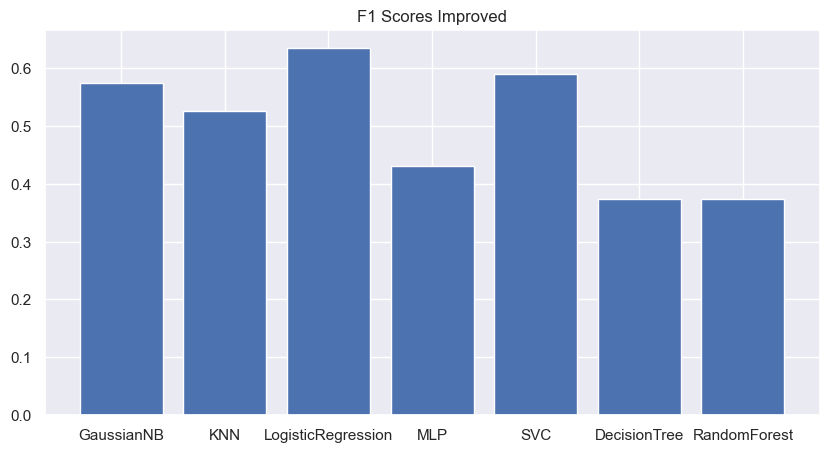

In [35]:
#predicting with the improved models
accuracy_scores_improved = []
f1_scores_improved = []
models_improved = [gnb_improved,knn_imp,lr_improved,mlp_improved,svc_imp,decision_tree_improved,random_forest_improved]
for model in models_improved:
    y_pred = model.predict(X_test)
    accuracy_scores_improved.append(accuracy_score(y_test,y_pred))
    f1_scores_improved.append(f1_score(y_test,y_pred,average="weighted"))

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],accuracy_scores_improved)
plt.title("Accuracy Scores Improved")
plt.show()
#plot f1 scores
plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],f1_scores_improved)
plt.title("F1 Scores Improved")
plt.show()




best score for lr: {'classifier__C': 1.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
best score for mlp: {'classifier__activation': 'identity', 'classifier__alpha': 0.0001, 'classifier__early_stopping': True, 'classifier__hidden_layer_sizes': (), 'classifier__learning_rate': 'constant', 'classifier__max_iter': 100, 'classifier__solver': 'sgd'}
best score for svc: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
best score for decision tree: {'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
best score for random forest: {'classifier__max_depth': 1, 'classifier__n_estimators': 10}
best score for knn: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1}
best score for gnb: {'classifier__var_smoothing': 1e-09}


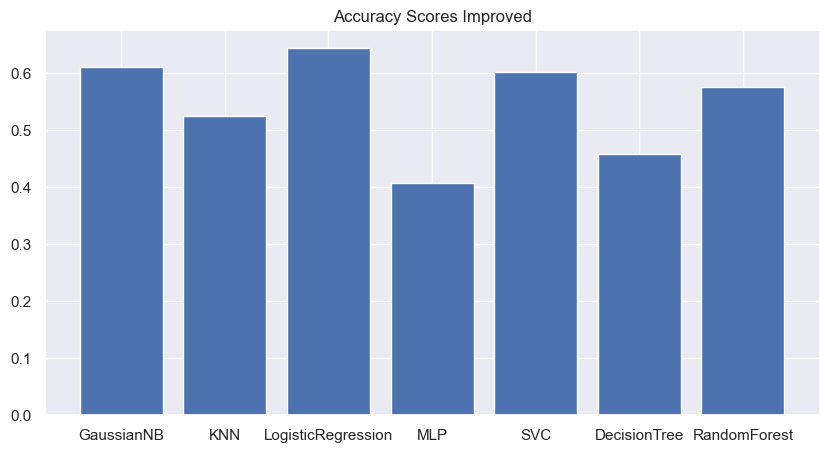

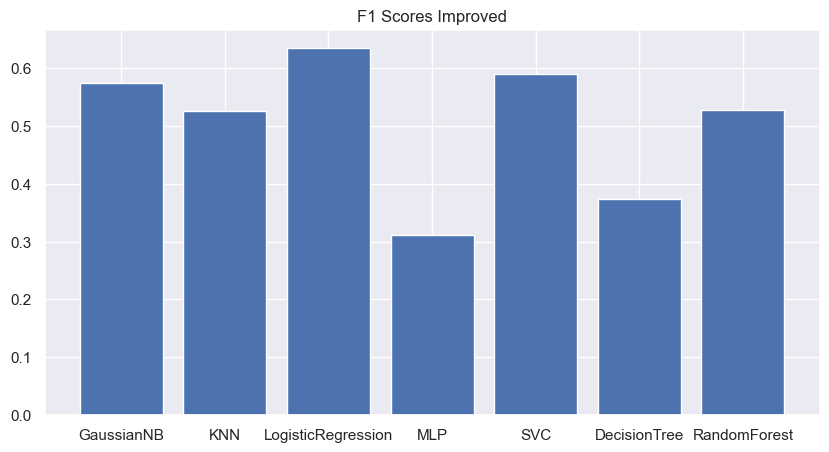

In [36]:
#gridsearch for lr
search_space =[{ 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10),
                 'classifier__solver': ['liblinear']
                  }]
pipe = Pipeline(steps=[('classifier', LogisticRegression())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
import warnings
warnings.filterwarnings("ignore")
lr_improved= clf.fit(X_train, y_train)
print('best score for lr:',lr_improved.best_params_)
#gridsearch for mlp
search_space = [{
                'classifier__hidden_layer_sizes': [(),(10),(20),(100)],
                'classifier__solver': ['sgd', 'adam'],
                'classifier__alpha': [0.0001, 0.05, 0.005, 0.01],
                'classifier__learning_rate': ['constant','adaptive'],
                'classifier__max_iter': [100, 1000, 10000],
                'classifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
                'classifier__early_stopping': [True, False]
                }]

pipe = Pipeline(steps=[('classifier', MLPClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
mlp_improved= clf.fit(X_train, y_train)
print('best score for mlp:',mlp_improved.best_params_)
#gridsearch for svc
search_space =[
                {'classifier__kernel': ['rbf'], 
                 'classifier__gamma': [1e-3, 1e-4], 
                 'classifier__C': [1, 10, 100, 1000],
                'classifier__class_weight': ['balanced', None]
                    
                }]
pipe = Pipeline(steps=[('classifier', SVC())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
svc_imp=clf.fit(X_train, y_train)
print('best score for svc:',svc_imp.best_params_)
#gridsearch for decision tree
search_space =[{  'classifier__criterion': ['gini', 'entropy'],
                  'classifier__splitter': ['best', 'random'],
                  'classifier__max_depth': [1,5,10],
                  'classifier__min_samples_split': [2,5,10],
                  'classifier__min_samples_leaf': [1,510],
                } ]
pipe = Pipeline(steps=[('classifier', DecisionTreeClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
decision_tree_improved= clf.fit(X_train, y_train)
print('best score for decision tree:',decision_tree_improved.best_params_)
#gridsearch for random forest
search_space =[
                {'classifier__n_estimators': [10,100,200,500,1000],
                 'classifier__max_depth': [1,5,10],
                }]
pipe = Pipeline(steps=[('classifier', RandomForestClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
random_forest_improved= clf.fit(X_train, y_train)
print('best score for random forest:',random_forest_improved.best_params_)
#gridsearch for knn
search_space =[
                
                {'classifier__n_neighbors': [1, 3, 5, 7],
                 'classifier__metric':['euclidean','manhattan'],
                    
                }]
pipe = Pipeline(steps=[('classifier', KNeighborsClassifier())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
knn_imp=clf.fit(X_train, y_train)
print('best score for knn:',knn_imp.best_params_)
#gridsearch for gnb
search_space =[
    {'classifier__var_smoothing': [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]

                }]
pipe = Pipeline(steps=[('classifier', GaussianNB())])
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='f1',n_jobs=-1)
import warnings
warnings.filterwarnings("ignore")
gnb_improved= clf.fit(X_train, y_train)
print('best score for gnb:',gnb_improved.best_params_)


#predicting with the improved models
accuracy_scores_improved = []
f1_scores_improved = []
models_improved = [gnb_improved,knn_imp,lr_improved,mlp_improved,svc_imp,decision_tree_improved,random_forest_improved]
for model in models_improved:
    y_pred = model.predict(X_test)
    accuracy_scores_improved.append(accuracy_score(y_test,y_pred))
    f1_scores_improved.append(f1_score(y_test,y_pred,average="weighted"))

plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],accuracy_scores_improved)
plt.title("Accuracy Scores Improved")
plt.show()
#plot f1 scores
plt.figure(figsize=(10,5))
plt.bar(["GaussianNB","KNN","LogisticRegression","MLP","SVC","DecisionTree","RandomForest"],f1_scores_improved)
plt.title("F1 Scores Improved")
plt.show()




In [37]:
#optuna for knn
def objective(trial):
    vr = VarianceThreshold(0.0001)
    sc = StandardScaler()
    

    score = 0
  
    x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)
    y_train =  np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    x_train = vr.fit_transform(x_train)
    mask = vr.get_support()
    x_test = np.array(x_test)[:,mask]

    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
    
        # Sample hyper parameters
    n_neighbors = trial.suggest_int('n_neighbors', 1, 10)
    metric = trial.suggest_categorical("metric", 
                                              ["euclidean", "manhattan"])
    weights = trial.suggest_categorical('weights', 
                                           ["uniform","distance"])
    p = trial.suggest_int('p',1,10)
        # Construct the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,
                               metric=metric,
                              weights=weights,
                               p=p
                               )

    score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
    
        

    return score



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
#print the best parameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)


[I 2023-03-14 14:57:19,092] A new study created in memory with name: no-name-e59f6e66-bcb9-48e6-a98f-103dd1d89c24
[I 2023-03-14 14:57:19,148] Trial 0 finished with value: 0.5645238095238094 and parameters: {'n_neighbors': 1, 'metric': 'euclidean', 'weights': 'uniform', 'p': 8}. Best is trial 0 with value: 0.5645238095238094.
[I 2023-03-14 14:57:19,180] Trial 1 finished with value: 0.57609243697479 and parameters: {'n_neighbors': 7, 'metric': 'manhattan', 'weights': 'distance', 'p': 8}. Best is trial 1 with value: 0.57609243697479.
[I 2023-03-14 14:57:19,220] Trial 2 finished with value: 0.561108776844071 and parameters: {'n_neighbors': 9, 'metric': 'euclidean', 'weights': 'distance', 'p': 5}. Best is trial 1 with value: 0.57609243697479.
[I 2023-03-14 14:57:19,270] Trial 3 finished with value: 0.5682679738562092 and parameters: {'n_neighbors': 4, 'metric': 'euclidean', 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.57609243697479.
[I 2023-03-14 14:57:19,327] Trial 4 fini

Number of finished trials: 50
Best trial: {'n_neighbors': 7, 'metric': 'manhattan', 'weights': 'distance', 'p': 8}
Best value: 0.57609243697479


In [38]:
import optuna
import sklearn.datasets
from sklearn.datasets import fetch_openml
import sklearn.neural_network

def objective(trial):
    vr = VarianceThreshold(0.0001)
    sc = StandardScaler()
    

    score = 0
  
    x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)
    y_train =  np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    x_train = vr.fit_transform(x_train)
    mask = vr.get_support()
    x_test = np.array(x_test)[:,mask]

    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
    
        # Sample hyper parameters
    activation = trial.suggest_categorical('activation', ["identity", "logistic", "tanh", "relu"])
    solver = trial.suggest_categorical("solver", 
                                              ["sgd", "adam"])
    tol = trial.suggest_float('tol', 1e-8,1e-1, step= 1e-7)
    learning_rate = trial.suggest_categorical('learning_rate', 
                                           ["constant","invscaling"])
    layers = trial.suggest_int('layers',100,1000,100)
        # Construct the model
    clf = MLPClassifier(activation=activation,
                               solver=solver,
                              tol=tol,
                               learning_rate=learning_rate,
                               hidden_layer_sizes=layers, random_state=0, max_iter=3000
                               )

    score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
    
        

    return score


    

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
#print the best parameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)



[I 2023-03-14 14:57:21,499] A new study created in memory with name: no-name-36c94cfb-827b-4139-8ff4-7c63ab833aa9
[I 2023-03-14 14:57:22,415] Trial 0 finished with value: 0.31311157796451916 and parameters: {'activation': 'relu', 'solver': 'sgd', 'tol': 0.04105861, 'learning_rate': 'invscaling', 'layers': 600}. Best is trial 0 with value: 0.31311157796451916.
[I 2023-03-14 14:57:24,218] Trial 1 finished with value: 0.30523809523809525 and parameters: {'activation': 'tanh', 'solver': 'sgd', 'tol': 0.04004011, 'learning_rate': 'invscaling', 'layers': 800}. Best is trial 0 with value: 0.31311157796451916.
[I 2023-03-14 14:57:24,951] Trial 2 finished with value: 0.33541666666666664 and parameters: {'activation': 'logistic', 'solver': 'sgd', 'tol': 0.013105509999999999, 'learning_rate': 'invscaling', 'layers': 300}. Best is trial 2 with value: 0.33541666666666664.
[I 2023-03-14 14:57:26,170] Trial 3 finished with value: 0.5595915032679739 and parameters: {'activation': 'identity', 'solver':

Number of finished trials: 50
Best trial: {'activation': 'identity', 'solver': 'adam', 'tol': 0.09802650999999998, 'learning_rate': 'constant', 'layers': 600}
Best value: 0.584454948646125


In [39]:
def objective_svm(trial):
    vr = VarianceThreshold(0.0001)
    sc = StandardScaler()

    score = 0
  
    x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=0)
    y_train =  np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    x_train = vr.fit_transform(x_train)
    mask = vr.get_support()
    x_test = np.array(x_test)[:,mask]

    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
 
    # Sample hyper parameters
    C = trial.suggest_float('C', 1e-10, 1)
    kernel = trial.suggest_categorical('kernel',['poly','rbf','sigmoid'])
    degree = trial.suggest_int('degree',1, 50)
    
    clf = SVC(C=C,kernel=kernel,degree=degree, random_state=0, max_iter=3000)
    score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
    return score


    

study = optuna.create_study(direction='maximize')
study.optimize(objective_svm, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)



[I 2023-03-14 14:58:09,981] A new study created in memory with name: no-name-9e6d1880-9ad9-4f44-b141-c767eba60b01
[I 2023-03-14 14:58:10,139] Trial 0 finished with value: 0.558374183006536 and parameters: {'C': 0.3110286764318168, 'kernel': 'rbf', 'degree': 30}. Best is trial 0 with value: 0.558374183006536.
[I 2023-03-14 14:58:10,285] Trial 1 finished with value: 0.5510866013071896 and parameters: {'C': 0.4479224523725552, 'kernel': 'rbf', 'degree': 2}. Best is trial 0 with value: 0.558374183006536.
[I 2023-03-14 14:58:10,430] Trial 2 finished with value: 0.5581535947712417 and parameters: {'C': 0.7012691105054571, 'kernel': 'rbf', 'degree': 5}. Best is trial 0 with value: 0.558374183006536.
[I 2023-03-14 14:58:10,544] Trial 3 finished with value: 0.5105228758169935 and parameters: {'C': 0.5147201574153836, 'kernel': 'sigmoid', 'degree': 34}. Best is trial 0 with value: 0.558374183006536.
[I 2023-03-14 14:58:10,665] Trial 4 finished with value: 0.4120016339869281 and parameters: {'C':

Number of finished trials: 50
Best trial: {'C': 0.9998380650135615, 'kernel': 'rbf', 'degree': 18}
Best value: 0.5656045751633988


In [40]:
#optuna for decision tree
def objective(trial):

    vr = VarianceThreshold(0.0001)
    sc = StandardScaler()
    

    score = 0
  
    x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)
    y_train =  np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    x_train = vr.fit_transform(x_train)
    mask = vr.get_support()
    x_test = np.array(x_test)[:,mask]

    x_train = sc.fit_transform(x_train)
    x_test = sc.fit_transform(x_test)
    
        # Sample hyper parameters
    criterion = trial.suggest_categorical('criterion', ["gini", "entropy"])
    splitter = trial.suggest_categorical("splitter", 
                                              ["best", "random"])
    max_depth = trial.suggest_int('max_depth',1,10)
    min_samples_split = trial.suggest_int('min_samples_split',2,10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',1,10)
    max_features = trial.suggest_categorical('max_features', 
                                           ["auto","sqrt","log2"])
        # Construct the model
    clf = DecisionTreeClassifier(criterion=criterion,
                               splitter=splitter,
                              max_depth=max_depth,
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf,
                               max_features=max_features
                               )

    score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
    
        

    return score



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
#print the best parameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)


[I 2023-03-14 14:58:17,729] A new study created in memory with name: no-name-3b73bd48-5009-47ca-b211-317f74dae4d2
[I 2023-03-14 14:58:17,765] Trial 0 finished with value: 0.5248167600373483 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 0 with value: 0.5248167600373483.
[I 2023-03-14 14:58:17,796] Trial 1 finished with value: 0.5158951914098974 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'auto'}. Best is trial 0 with value: 0.5248167600373483.
[I 2023-03-14 14:58:17,829] Trial 2 finished with value: 0.4620915032679738 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.5248167600373483.
[I 2023-03-14 14:58:17,861] Trial 3 finished with value: 0.55111

Number of finished trials: 50
Best trial: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}
Best value: 0.5622280578898226


In [41]:
#optuna for random forest
def objective(trial):
    
        vr = VarianceThreshold(0.0001)
        sc = StandardScaler()
        
    
        score = 0
    
        x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)
        y_train =  np.ravel(y_train)
        y_test = np.ravel(y_test)
        
        x_train = vr.fit_transform(x_train)
        mask = vr.get_support()
        x_test = np.array(x_test)[:,mask]
    
        x_train = sc.fit_transform(x_train)
        x_test = sc.fit_transform(x_test)
        
            # Sample hyper parameters
        criterion = trial.suggest_categorical('criterion', ["gini", "entropy"])
        max_depth = trial.suggest_int('max_depth',1,10)
        min_samples_split = trial.suggest_int('min_samples_split',2,10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf',1,10)
        max_features = trial.suggest_categorical('max_features', 
                                            ["auto","sqrt","log2"])
        n_estimators = trial.suggest_int('n_estimators',10,100)
            # Construct the model
        clf = RandomForestClassifier(criterion=criterion,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                n_estimators=n_estimators
                                )
    
        score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
        
            
    
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
#print the best parameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)


[I 2023-03-14 14:58:19,973] A new study created in memory with name: no-name-0258d1e5-ae41-459e-9482-eb2005aebec3
[I 2023-03-14 14:58:21,171] Trial 0 finished with value: 0.5882154528478059 and parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'auto', 'n_estimators': 49}. Best is trial 0 with value: 0.5882154528478059.
[I 2023-03-14 14:58:21,767] Trial 1 finished with value: 0.5924696545284781 and parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'n_estimators': 22}. Best is trial 1 with value: 0.5924696545284781.
[I 2023-03-14 14:58:22,024] Trial 2 finished with value: 0.5770284780578898 and parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'n_estimators': 11}. Best is trial 1 with value: 0.5924696545284781.
[I 2023-03-14 14:58:23,759] Trial 3 finished with value: 0.598509570

Number of finished trials: 50
Best trial: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'n_estimators': 65}
Best value: 0.6259418767507003


In [42]:
#optuna for gnb
def objective(trial):
        
            vr = VarianceThreshold(0.0001)
            sc = StandardScaler()
            
        
            score = 0
        
            x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)
            y_train =  np.ravel(y_train)
            y_test = np.ravel(y_test)
            
            x_train = vr.fit_transform(x_train)
            mask = vr.get_support()
            x_test = np.array(x_test)[:,mask]
        
            x_train = sc.fit_transform(x_train)
            x_test = sc.fit_transform(x_test)
            
                # Sample hyper parameters
            var_smoothing = trial.suggest_float('var_smoothing',1e-10,1e-1, step= 1e-7)
                # Construct the model
            clf = GaussianNB(var_smoothing=var_smoothing)
        
            score = np.mean(cross_val_score(clf,x_train,y_train,scoring='balanced_accuracy',cv=10))
            
                
        
            return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
#print the best parameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)


[I 2023-03-14 14:59:34,406] A new study created in memory with name: no-name-9ce934df-d275-45a5-8b51-72b5ca938329
[I 2023-03-14 14:59:34,441] Trial 0 finished with value: 0.5286274509803921 and parameters: {'var_smoothing': 0.0366161001}. Best is trial 0 with value: 0.5286274509803921.
[I 2023-03-14 14:59:34,471] Trial 1 finished with value: 0.5279096638655462 and parameters: {'var_smoothing': 0.007616600099999999}. Best is trial 0 with value: 0.5286274509803921.
[I 2023-03-14 14:59:34,503] Trial 2 finished with value: 0.5286274509803921 and parameters: {'var_smoothing': 0.0727767001}. Best is trial 0 with value: 0.5286274509803921.
[I 2023-03-14 14:59:34,527] Trial 3 finished with value: 0.5305882352941176 and parameters: {'var_smoothing': 0.08193490009999999}. Best is trial 3 with value: 0.5305882352941176.
[I 2023-03-14 14:59:34,551] Trial 4 finished with value: 0.5279096638655462 and parameters: {'var_smoothing': 0.0011548001}. Best is trial 3 with value: 0.5305882352941176.
[I 202

Number of finished trials: 50
Best trial: {'var_smoothing': 0.08193490009999999}
Best value: 0.5305882352941176


### Τελικά Συμπεράσματα
* Επαναλαμβάνοντας τις μεθόδους στο σύνολο δεδομένων με την προσθήκη της ηλικίας και του φύλου, παρατηρούμε ότι η απόδοση των ταξινομητών δεν αυξάνεται σημαντικά. 
* Η εκπαίδευση του νευρωνικού έχει ήδη αρκετά καλα αποτελέσματατα, ήδη πριν τις προσπάθειες βελτιστοποίησης, πράγμα που κάνει τις βελτιστοποιήσεις πιο δύσκολες. Αυτό που φάνηκε να αποδίδει είναι η μέθοδος του pipeline, της προεπεξεργασίας των δεδομένων δηλαδή.
* Προκειμένου να αναπτυχθεί ενα νευρωνικό που το αποτέλεσμα του να είναι αξιόπιστο απαιτείται σίγουρα εμπλουτισμός του συνόλου δεδομένων και από τις 3 κατηγορίες που μελετάμε, πιθανώς να διευρυνθεί η ηλικιακή κατανομή (να αντλήσουμε δεδομένα και για νεότερους ασθενείς) και να υπάρξει μια ειδίκευση στην κατηγορία 2, ως προς την ασθένεια που εντοπίζεται.